In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel(r'D:\Machine_learning\logistic\diabetes.xlsx', sheet_name = 'Sheet1')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
df['diabetes'].replace({
    True : 1, 
    False : 0
}, inplace = True)

In [4]:
df.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0


In [5]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [6]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [7]:
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes          int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df['diabetes'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: diabetes, dtype: float64

In [10]:
df.shape

(768, 10)

(array([111.,   0., 135.,   0.,   0., 103.,   0.,   0.,  75.,   0.,   0.,
         68.,   0.,   0.,  57.,   0.,   0.,  50.,   0.,   0.,  45.,   0.,
          0.,  38.,   0.,   0.,  28.,   0.,   0.,  24.,   0.,   0.,  11.,
          0.,   0.,   9.,   0.,   0.,  10.,   0.,   0.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  0.34,  0.68,  1.02,  1.36,  1.7 ,  2.04,  2.38,  2.72,
         3.06,  3.4 ,  3.74,  4.08,  4.42,  4.76,  5.1 ,  5.44,  5.78,
         6.12,  6.46,  6.8 ,  7.14,  7.48,  7.82,  8.16,  8.5 ,  8.84,
         9.18,  9.52,  9.86, 10.2 , 10.54, 10.88, 11.22, 11.56, 11.9 ,
        12.24, 12.58, 12.92, 13.26, 13.6 , 13.94, 14.28, 14.62, 14.96,
        15.3 , 15.64, 15.98, 16.32, 16.66, 17.  ]),
 <BarContainer object of 50 artists>)

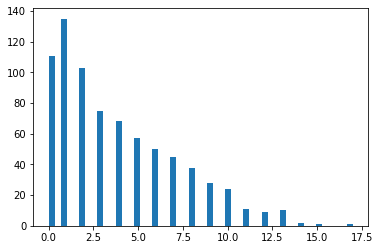

In [11]:
py.hist(df['num_preg'], bins = 50 )

<AxesSubplot:ylabel='diabetes'>

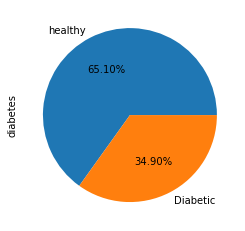

In [13]:
# visualizing the outcome value

df['diabetes'].value_counts().plot(kind='pie', autopct = '%0.2f%%', labels = ['healthy', 'Diabetic'])

num_preg            AxesSubplot(0.125,0.71587;0.168478x0.16413)
glucose_conc     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
diastolic_bp     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
thickness        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
insulin            AxesSubplot(0.125,0.518913;0.168478x0.16413)
bmi             AxesSubplot(0.327174,0.518913;0.168478x0.16413)
diab_pred       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
age             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
skin               AxesSubplot(0.125,0.321957;0.168478x0.16413)
diabetes        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

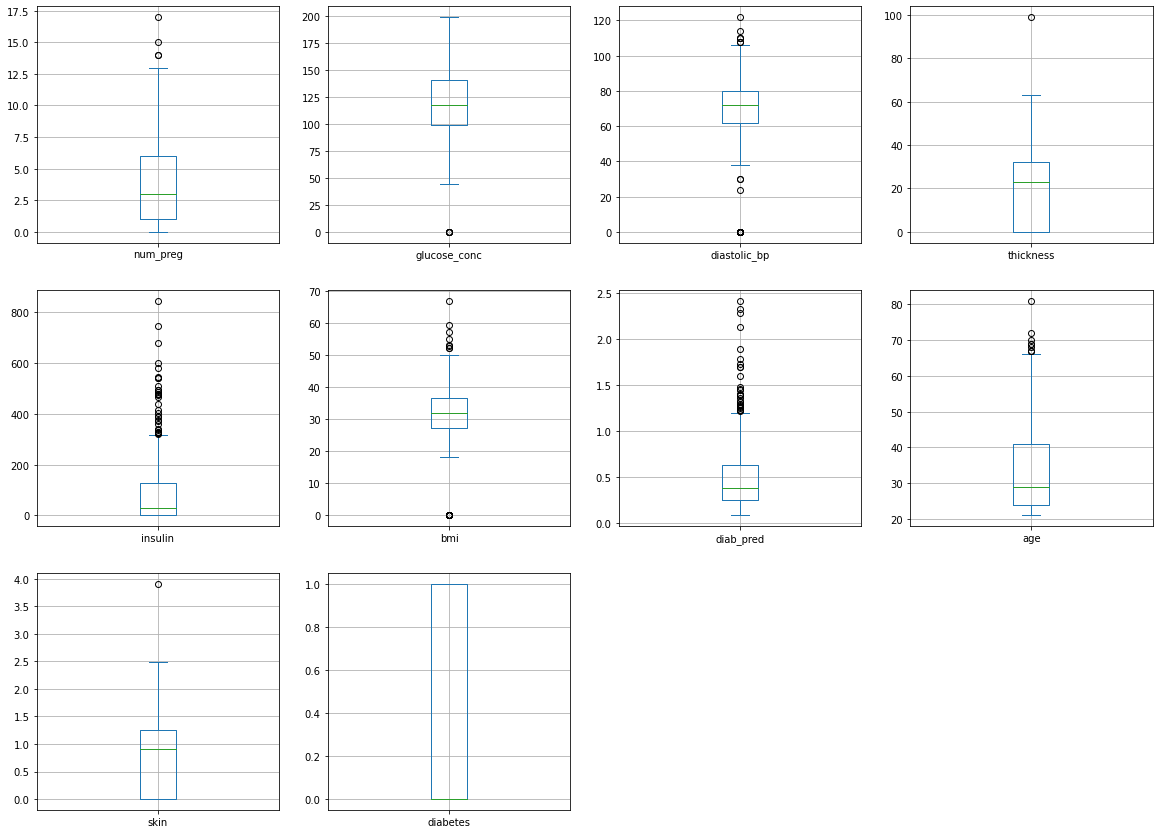

In [14]:
df.plot(kind = 'box', subplots = True, grid = True, figsize=(20,20),  layout=(4,4))

array([[<AxesSubplot:title={'center':'num_preg'}>,
        <AxesSubplot:title={'center':'glucose_conc'}>,
        <AxesSubplot:title={'center':'diastolic_bp'}>,
        <AxesSubplot:title={'center':'thickness'}>],
       [<AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'diab_pred'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

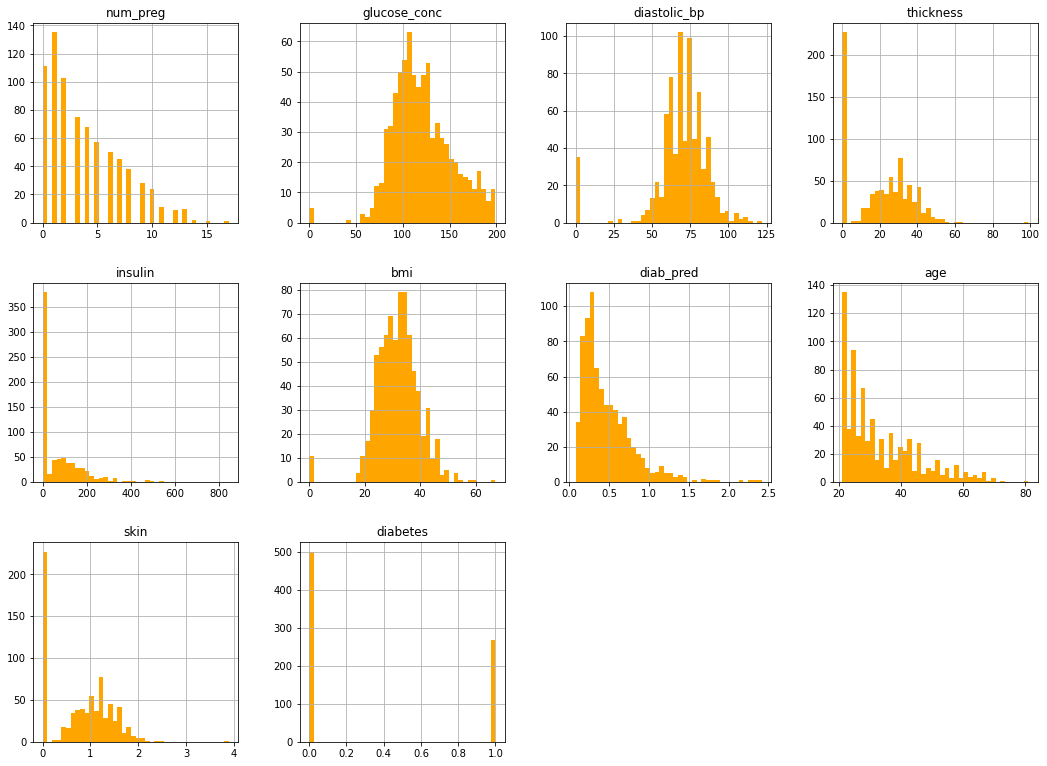

In [15]:
df.hist(figsize=(18,18),grid=True,layout=(4,4),bins=40,color='orange')

<Figure size 2160x2160 with 0 Axes>

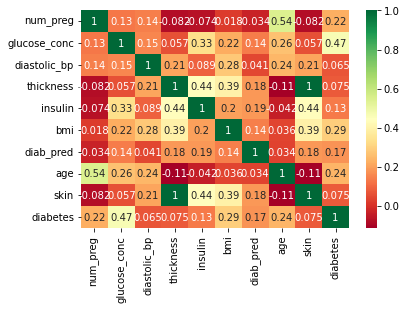

<Figure size 2160x2160 with 0 Axes>

In [16]:
matrix = df.corr()

sns.heatmap(matrix, annot = True, cmap = 'RdYlGn')
py.figure(figsize = (30,30))

In [17]:
df.loc[df['glucose_conc'] == 0]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
75,1,0,48,20,0,24.7,0.140,22,0.7880,0
182,1,0,74,20,23,27.7,0.299,21,0.7880,0
342,1,0,68,35,0,32.0,0.389,22,1.3790,0
349,5,0,80,32,0,41.0,0.346,37,1.2608,1
502,6,0,68,41,0,39.0,0.727,41,1.6154,1


In [18]:
# Check how many other missing(zero) values

print(f"total number of rows : {len(df)}")
print(f"number of rows missing glucose_conc: {len(df.loc[df['glucose_conc'] == 0])}")
print(f"number of rows missing glucose_conc: {len(df.loc[df['glucose_conc'] == 0])}")
print(f"number of rows missing diastolic_bp: {len(df.loc[df['diastolic_bp'] == 0])}")
print(f"number of rows missing insulin: {len(df.loc[df['insulin'] == 0])}")
print(f"number of rows missing bmi: {len(df.loc[df['bmi'] == 0])}")
print(f"number of rows missing diab_pred: {len(df.loc[df['diab_pred'] == 0])}")
print(f"number of rows missing age: {len(df.loc[df['age'] == 0])}")
print(f"number of rows missing skin: {len(df.loc[df['skin'] == 0])}")

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [19]:
features = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
pred_val = ['diabetes']

In [20]:
x = df[features]  #.values
y = df[pred_val]  #.values

In [21]:
from sklearn.ensemble import ExtraTreesRegressor

feature_selection = ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [22]:
print(feature_selection.feature_importances_)

[0.09773743 0.2832854  0.08992847 0.04539346 0.05973538 0.1335165
 0.1057994  0.13622455 0.04837941]


<AxesSubplot:>

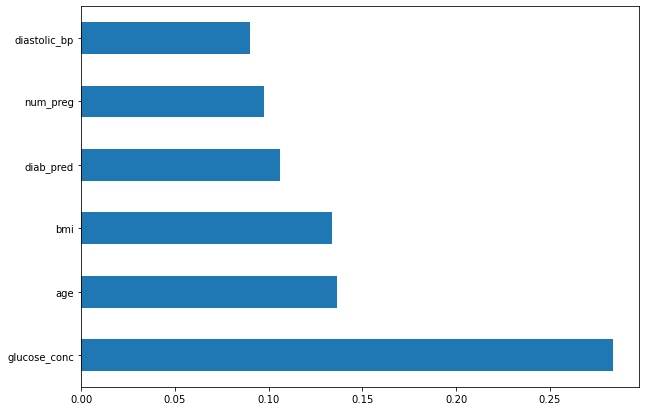

In [23]:
py.figure(figsize = (10, 7))
feat_importances = pd.Series(feature_selection.feature_importances_, index = x.columns)
feat_importances.nlargest(6).plot(kind = 'barh')

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_scaled = scaler.fit_transform(x)

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state= 101)

In [27]:
# handle missing values: apply mean on their respective columns

from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values= 0, strategy='mean')

# fill_values = Imputer(missing_values = 0, strategy= "mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [28]:
logic_model = LogisticRegression()

logic_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
logic_model.score(X_test, y_test)

0.7987012987012987

In [ ]:
# Using hyperparameter tuning..

In [30]:
params={
 "solver" : ["lbfgs", "sag", "saga"] ,
 "penalty" : ["none", "L1", "L2"]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

lr_model = LogisticRegression()

random_search = RandomizedSearchCV(lr_model, param_distributions = params, cv=5, verbose=1)

In [32]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['none', 'L1', 'L2'],
                                        'solver': ['lbfgs', 'sag', 'saga']},
                   verbose=1)

In [33]:
random_search.best_params_

{'solver': 'lbfgs', 'penalty': 'none'}

In [34]:
log_model = LogisticRegression(solver = 'lbfgs', penalty =  'none')

In [35]:
score = cross_val_score(log_model, X_train, y_train, cv= 10)

In [36]:
score

array([0.79032258, 0.74193548, 0.75806452, 0.70967742, 0.7704918 ,
       0.85245902, 0.85245902, 0.72131148, 0.75409836, 0.7704918 ])

In [37]:
score.mean()

0.7721311475409836

In [38]:
import pickle

with open(r"C:\Users\HP\Logistic_diabetes", "wb") as f:
    pickle.dump(random_search, f)